In [73]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [74]:
np.random.seed(0)

In [75]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [76]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [77]:
assert(X_train.shape[0] == Y_train.shape[0]),"Number of images not equal to number of labels"

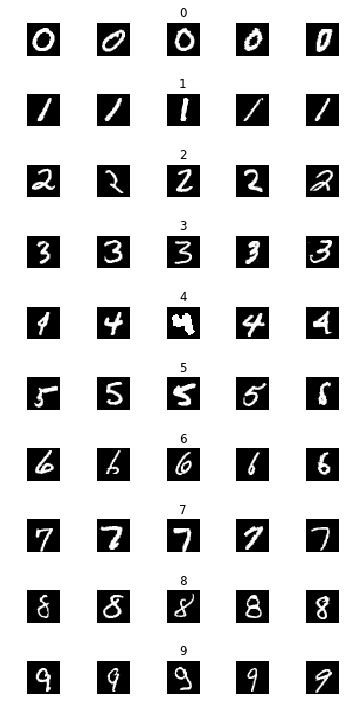

In [78]:
num_samples=[]

cols = 5
rows = 10

fig,axis = plt.subplots(nrows = rows,ncols = cols,figsize = [5,10])
fig.tight_layout()

for i in range (cols):
    for j in range (rows):
        x_selected = X_train[Y_train==j]
        axis[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if(i==2):
            axis[j][i].set_title(str(j))
            num_samples.append(len(x_selected))

In [79]:
print(num_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of samples')

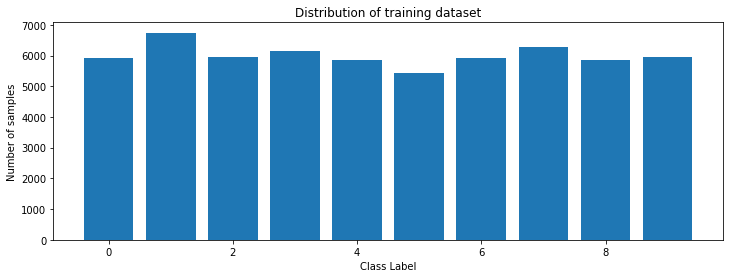

In [80]:
plt.figure(figsize=(12,4))
plt.bar(range(0,rows),num_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of samples")

In [81]:
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

In [82]:
#normalisation process, makes it easier to find the proper weights, bias, and hyperparameter values  
X_train = X_train/255
X_test = X_test/255

In [83]:
number_pixels = 784
X_train = X_train.reshape(X_train.shape[0],number_pixels)
X_test = X_test.reshape(X_test.shape[0],number_pixels)
#print(X_train.shape)
#print(X_test.shape)

In [84]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=number_pixels,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model;

In [85]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
history =model.fit(X_train,Y_train,validation_split = 0.1,epochs=12,batch_size=200,verbose=1,shuffle=1 )

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 1s 22us/step - loss: 0.6036 - acc: 0.8156 - val_loss: 0.2877 - val_acc: 0.9167
Epoch 2/12
54000/54000 [==============================] - 1s 16us/step - loss: 0.3493 - acc: 0.9010 - val_loss: 0.2689 - val_acc: 0.9188
Epoch 3/12
54000/54000 [==============================] - 1s 16us/step - loss: 0.3113 - acc: 0.9085 - val_loss: 0.2520 - val_acc: 0.9265
Epoch 4/12
54000/54000 [==============================] - 1s 16us/step - loss: 0.2926 - acc: 0.9145 - val_loss: 0.2252 - val_acc: 0.9350
Epoch 5/12
54000/54000 [==============================] - 1s 16us/step - loss: 0.2779 - acc: 0.9178 - val_loss: 0.2161 - val_acc: 0.9353
Epoch 6/12
54000/54000 [==============================] - 1s 16us/step - loss: 0.2653 - acc: 0.9229 - val_loss: 0.2203 - val_acc: 0.9343
Epoch 7/12
54000/54000 [==============================] - 1s 16us/step - loss: 0.2566 - acc: 0.9240 - val_loss: 0.2390 - val_acc:

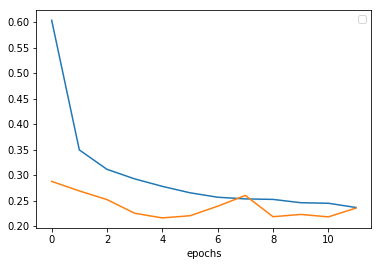

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epochs')
plt.legend('loss','val_loss')

In [88]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test score = ',score[0])
print('Test Accuracy = ',score[1])

Test score =  0.31424585758596657
Test Accuracy =  0.9115


predicted digit =  [3]


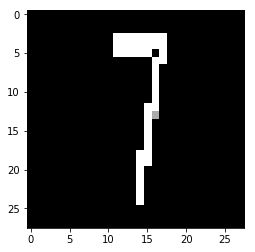

In [92]:
import requests
from PIL import Image
#url ='E:\ML\nine.png'
#response=requests.get(url,stream=True)

img = Image.open('E:\\ML\\nine.png')

import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

image = image/255
image = image.reshape(1,784)
pred= model.predict_classes(image)
print("predicted digit = ",str(pred))